# Machine Learning Pipeline
1. Data Preprocessing
2. Feature Engineering
3. Model Selection
4. Model Training
5. Model Evaluation

In [ ]:
# important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

**Data Preprocessing:** This section contains preprocessing method and makes ready our dataset for
Feature Engineering and Model training.

In [ ]:
# read the dataset
data = pd.read_csv("/content/drive/MyDrive/Final-Project/data/attack-data.csv")
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,443,18738,1,1,6,6,6,6,6.0,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
2830739,53,60797,2,2,80,156,40,40,40.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
2830740,53,154,2,2,64,96,32,32,32.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
2830741,53,155,2,2,80,144,40,40,40.0,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [ ]:
# dataset feature information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [ ]:
# dataset features
data.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [ ]:
# Label checking
data[' Label']

,Label
0,BENIGN
1,BENIGN
2,BENIGN
3,BENIGN
4,BENIGN
...,...
2830738,BENIGN
2830739,BENIGN
2830740,BENIGN
2830741,BENIGN


In [ ]:
data[' Label'].value_counts()

,count
Label,
BENIGN,2273097
DoS Hulk,231073
PortScan,158930
DDoS,128027
DoS GoldenEye,10293
FTP-Patator,7938
SSH-Patator,5897
DoS slowloris,5796
DoS Slowhttptest,5499


In [ ]:
# checking for null values
np.array(data.isna().sum())

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 1358,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0])

In [ ]:
# check for infinity
np.array(np.isinf(data.drop(' Label',axis=1)).sum())

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 1509, 2867,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

In [ ]:
# dropping Null values
data.dropna(inplace=True)

In [ ]:
# Check the indexes infinity
index = np.where(np.array(np.isinf(data.drop(' Label', axis=1)).sum()))
index

(array([14, 15]),)

In [ ]:
# Check Columns name of infinity
data.columns[index]

Index(['Flow Bytes/s', ' Flow Packets/s'], dtype='object')

In [ ]:
# Checking as Numpy array, does infinity in both feature are in same rows
np.array(data[data[' Flow Packets/s'] == float('inf')] == data[data['Flow Bytes/s'] == float('inf')]).all()

np.True_

In [ ]:
# Checking the Label feature as all infinity values are normal packets or no
data[data[' Flow Packets/s'] == float('inf')][' Label'].value_counts()

,count
Label,
BENIGN,1368
PortScan,126
Bot,10
FTP-Patator,3
DDoS,2


In [ ]:
def infinity_to_mean():
  '''
  This function is going to convert infinity value to mean of every its own label
  '''
  # Selecting the data which has infinity by their label
  normal_data = data[data[' Label'] == 'BENIGN']
  portscan_data = data[data[' Label'] == 'PortScan']
  bot_data = data[data[' Label'] == 'Bot']
  ddos_data = data[data[' Label'] == 'DDoS']
  FTP_Patator_data = data[data[' Label'] == 'FTP-Patator']

  '''
  Storing mean of every feature
  '''
  # Normal_data Mean of flow packets and flow Bytes features
  normal_mean_flow_packets = normal_data.replace([np.inf, -np.inf], np.nan)[' Flow Packets/s'].mean()
  normal_mean_flow_bytes = normal_data.replace([np.inf, -np.inf], np.nan)['Flow Bytes/s'].mean()

  # Portscan mean's of flow bytes and packets feature
  portscan_mean_flow_packets = portscan_data.replace([np.inf, -np.inf], np.nan)[' Flow Packets/s'].mean()
  portscan_mean_flow_bytes = portscan_data.replace([np.inf, -np.inf], np.nan)['Flow Bytes/s'].mean()

  # DDoS mean's of flow bytes and packets feature
  ddos_mean_flow_packets = ddos_data.replace([np.inf, -np.inf], np.nan)[' Flow Packets/s'].mean()
  ddos_mean_flow_bytes = ddos_data.replace([np.inf, -np.inf], np.nan)['Flow Bytes/s'].mean()

  # Bot mean's of flow bytes and packets feature
  bot_mean_flow_packets = bot_data.replace([np.inf, -np.inf], np.nan)[' Flow Packets/s'].mean()
  bot_mean_flow_bytes = bot_data.replace([np.inf, -np.inf], np.nan)['Flow Bytes/s'].mean()

  # FTP_Patator mean's of flow bytes and packets feature
  FTP_Patator_mean_flow_packets = FTP_Patator_data.replace([np.inf, -np.inf], np.nan)[' Flow Packets/s'].mean()
  FTP_Patator_mean_flow_bytes = FTP_Patator_data.replace([np.inf, -np.inf], np.nan)['Flow Bytes/s'].mean()

  '''
  Replacing each feature infinity with mean of its label
  '''
  # replacing the inf value of normal data with mean of flow packets
  data.loc[data[' Label'] == 'BENIGN', ' Flow Packets/s'] = data.loc[data[' Label'] == 'BENIGN', ' Flow Packets/s'].replace([np.inf, -np.inf], normal_mean_flow_packets)


  # replacing the inf value of normal with mean of flow Bytes
  data.loc[data[' Label'] == 'BENIGN', 'Flow Bytes/s'] = data.loc[data[' Label'] == 'BENIGN', 'Flow Bytes/s'].replace([np.inf, -np.inf], normal_mean_flow_bytes)


  # replacing the inf value of porscan with mean of flow Bytes
  data.loc[data[' Label'] == 'PortScan', 'Flow Bytes/s'] = data.loc[data[' Label'] == 'PortScan', 'Flow Bytes/s'].replace([np.inf, -np.inf], portscan_mean_flow_bytes)


  # replacing the inf value of porscan with mean of flow Packets
  data.loc[data[' Label'] == 'PortScan', ' Flow Packets/s'] = data.loc[data[' Label'] == 'PortScan', ' Flow Packets/s'].replace([np.inf, -np.inf], portscan_mean_flow_packets)


  # replacing the inf value of DDoS with mean of flow Packets
  data.loc[data[' Label'] == 'DDoS', ' Flow Packets/s'] = data.loc[data[' Label'] == 'DDoS', ' Flow Packets/s'].replace([np.inf, -np.inf], ddos_mean_flow_packets)


  # replacing the inf value of DDoS with mean of flow Bytes
  data.loc[data[' Label'] == 'DDoS', 'Flow Bytes/s'] = data.loc[data[' Label'] == 'DDoS', 'Flow Bytes/s'].replace([np.inf, -np.inf], ddos_mean_flow_bytes)


  # replacing the inf value of Bot with mean of flow Bytes
  data.loc[data[' Label'] == 'Bot', 'Flow Bytes/s'] = data.loc[data[' Label'] == 'Bot', 'Flow Bytes/s'].replace([np.inf, -np.inf], bot_mean_flow_bytes)


  # replacing the inf value of Bot with mean of flow Packets
  data.loc[data[' Label'] == 'Bot', ' Flow Packets/s'] = data.loc[data[' Label'] == 'Bot', ' Flow Packets/s'].replace([np.inf, -np.inf], bot_mean_flow_packets)


  # replacing the inf value of FTP-Patator with mean of flow Packets
  data.loc[data[' Label'] == 'FTP-Patator', ' Flow Packets/s'] = data.loc[data[' Label'] == 'FTP-Patator', ' Flow Packets/s'].replace([np.inf, -np.inf], FTP_Patator_mean_flow_packets)


  # replacing the inf value of FTP-Patator with mean of flow Bytes
  data.loc[data[' Label'] == 'FTP-Patator', 'Flow Bytes/s'] = data.loc[data[' Label'] == 'FTP-Patator', 'Flow Bytes/s'].replace([np.inf, -np.inf], FTP_Patator_mean_flow_bytes)

  return data


# Now lets check do we have infinit values
infinity_to_mean()
np.array(np.isinf(data.drop(' Label',axis=1)).sum())

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Check statistic of feature values

def statistical_analysis(features):
  '''
  This function is going to check Minimum, Maximum, Mean, Median, Mode, Variance and Standard Deviacion.
  '''

  # store feature name as key and statistic as values
  feat_chrac = {}

  # check each feature and store its values
  for feature in features:
    feat_chrac[feature] = [data[feature].min(), data[feature].max(), data[feature].mean(), data[feature].median(),
                           data[feature].mode().iloc[0], data[feature].var(), data[feature].std()]

  return feat_chrac

statistical_analysis(data.drop(
    [' Fwd Header Length.1', ' Label', ' Destination Port'], axis=1
    ).columns)


{' Flow Duration': [np.int64(-13),
  np.int64(119999998),
  np.float64(14792760.50054906),
  np.float64(31327.0),
  np.int64(3),
  np.float64(1133013107080961.5),
  np.float64(33660260.056644864)],
 ' Total Fwd Packets': [np.int64(1),
  np.int64(219759),
  np.float64(9.364762660436808),
  np.float64(2.0),
  np.int64(2),
  np.float64(562279.0124370668),
  np.float64(749.8526604854228)],
 ' Total Backward Packets': [np.int64(0),
  np.int64(291922),
  np.float64(10.398688760985161),
  np.float64(2.0),
  np.int64(1),
  np.float64(995260.7677938157),
  np.float64(997.627569684106)],
 'Total Length of Fwd Packets': [np.int64(0),
  np.int64(12900000),
  np.float64(549.5660594086701),
  np.float64(62.0),
  np.int64(0),
  np.float64(99919615.589591),
  np.float64(9995.979971448072)],
 ' Total Length of Bwd Packets': [np.int64(0),
  np.int64(655453030),
  np.float64(16170.40001625795),
  np.float64(123.0),
  np.int64(0),
  np.float64(5124025568004.329),
  np.float64(2263631.058278784)],
 ' Fwd P

**Note**
This dataset requires Normalization. It has very huge maximum values as
makes the computation even harder and will cause bias and overfit. To reduce this, Normalization is one of methods.<br>
`Strategy`:<br>
To handle this I am creating two function one for flags as they are 0 or 1 and do not need normalization and another for checking outliers. <br>
`Outliers`: <br>
It is a data point that behaves differently from all other data points in the dataset.
`Source`: https://medium.com/@pp1222001/what-are-outliers-outliers-in-machine-learning-3a4804ab690

In [ ]:
# display features which have sum of less then 2 from chracteristic_feature function
def max_two_feature(features):
  '''
  This function is going to check if there is flags counts and
  features with maximum values less then or equal to value 2 take them as
  no normalization.
  '''
  feature_values = []
  for key, val in statistical_analysis(data.drop(' Label', axis=1).columns).items(): # taking just numerical type
    if max(val) <= 2 or 'Flag' in key:
      feature_values.append(key)

  return feature_values

In [ ]:
# Store features which has low values
low_val_feature = max_two_feature(data.drop([' Label',' Destination Port', ' Fwd Header Length.1'],axis=1))
low_val_feature

['Fwd PSH Flags',
 ' Bwd PSH Flags',
 ' Fwd URG Flags',
 ' Bwd URG Flags',
 'FIN Flag Count',
 ' SYN Flag Count',
 ' RST Flag Count',
 ' PSH Flag Count',
 ' ACK Flag Count',
 ' URG Flag Count',
 ' CWE Flag Count',
 ' ECE Flag Count',
 'Fwd Avg Bytes/Bulk',
 ' Fwd Avg Packets/Bulk',
 ' Fwd Avg Bulk Rate',
 ' Bwd Avg Bytes/Bulk',
 ' Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

In [ ]:
# Create a function for identifying any features with Outliers
def outlier_feature(features):
  '''
  This function will return list of all features which has Outliers either minimum of maximum
  '''
  # storing features which has outliers (upper or lower)
  outliers = []


  for feature in features:
    Q1 = data[feature].quantile(0.25) # quantile function will return any feature value as given its percentage
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    # identify outliers
    threshold = 1.5
    lower_boundary = Q1 - threshold * IQR # finding the lowest value of range of values in a feature
    upper_boundary = Q3 + threshold * IQR # find highest value of range of values in a feature
    low_and_high_outlier = [lower_boundary, upper_boundary]

    # Minimum & Maximum value of a feature
    min_val = data[feature].min()
    max_val = data[feature].max()


    # Checking the outliers
    if min_val < low_and_high_outlier[0]: # check if there is a value less then minimum of outliers
      if feature not in outliers and feature not in low_val_feature: # checking for duplicate key in dictionary and make sure of not adding no scale feature
        outliers.append(feature)

    elif max_val > low_and_high_outlier[1]: # checking if there is a vlue higher then maximum outliers
      if feature not in outliers and feature not in low_val_feature: # check for duplicate key
        outliers.append(feature)

  return outliers

In [ ]:
outliers = outlier_feature(data.drop([' Destination Port',' Label', ' Fwd Header Length.1'],axis=1).columns) # first column is Destination port which is important and does not need any scaling
outliers

[' Flow Duration',
 ' Total Fwd Packets',
 ' Total Backward Packets',
 'Total Length of Fwd Packets',
 ' Total Length of Bwd Packets',
 ' Fwd Packet Length Max',
 ' Fwd Packet Length Min',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 'Flow Bytes/s',
 ' Flow Packets/s',
 ' Flow IAT Mean',
 ' Flow IAT Std',
 ' Flow IAT Max',
 ' Flow IAT Min',
 'Fwd IAT Total',
 ' Fwd IAT Mean',
 ' Fwd IAT Std',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 'Bwd IAT Total',
 ' Bwd IAT Mean',
 ' Bwd IAT Std',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 ' Fwd Header Length',
 ' Bwd Header Length',
 'Fwd Packets/s',
 ' Bwd Packets/s',
 ' Min Packet Length',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' Down/Up Ratio',
 ' Average Packet Size',
 ' Avg Fwd Segment Size',
 ' Avg Bwd Segment Size',
 'Subflow Fwd Packets',
 ' Subflow Fwd Bytes',
 ' Subflow Bwd Pa

In [ ]:
len(outliers), len(low_val_feature)

(58, 18)

In [ ]:
# Checking which features are remain that are not included in both categories
def remain_feature(outliers, unnorm_fea):
  for feat in data.columns:
    if feat not in outliers and feat not in unnorm_fea:
      print(feat)
  return

remain_feature(outliers, low_val_feature)

 Destination Port
 Fwd Header Length.1
 Label


In [ ]:
# Import RobustScaler
from sklearn.preprocessing import RobustScaler

# Scale function
def scale_feature():
  '''
  This function is going to scale features in two steps:
  1. RobustScaler
  '''

  # RobustScaler
  robust = RobustScaler()

  # scaling
  data[outliers] = robust.fit_transform(data[outliers])

  return data

scale_feature()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,34.989205,10.000000,4.666667,36.491429,2.143750,4.880000,-0.055556,3.806818,7.824966,...,0.666667,3.594286e+02,1.199802e+01,380.0,343.0,16100000.0,4.988048e+05,16400000.0,15400000.0,BENIGN
1,389,34.989165,10.000000,4.666667,36.491429,10.277083,4.880000,-0.055556,3.806818,7.824966,...,0.666667,3.202857e+02,1.574499e+01,330.0,285.0,16100000.0,4.987937e+05,16400000.0,15400000.0,BENIGN
2,0,35.304823,181.000000,-0.666667,-0.354286,-0.256250,-0.493333,-0.055556,-0.772727,0.000000,...,-2.000000,9.361829e+06,7.324646e+06,18900000.0,19.0,12200000.0,6.935824e+06,20800000.0,5504997.0,BENIGN
3,5355,0.021358,6.666667,-0.666667,3.165714,-0.256250,-0.120000,0.722222,-0.136364,0.000000,...,0.666667,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
4,0,0.007274,0.666667,-0.666667,-0.354286,-0.256250,-0.493333,-0.055556,-0.772727,0.000000,...,-2.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,443,-0.003908,-0.333333,-0.333333,-0.320000,-0.243750,-0.413333,0.111111,-0.636364,0.000000,...,-0.333333,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
2830739,53,0.009149,0.000000,0.000000,0.102857,0.068750,0.040000,1.055556,0.136364,0.000000,...,0.666667,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
2830740,53,-0.009677,0.000000,0.000000,0.011429,-0.056250,-0.066667,0.833333,-0.045455,0.000000,...,0.666667,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
2830741,53,-0.009677,0.000000,0.000000,0.102857,0.043750,0.040000,1.055556,0.136364,0.000000,...,-0.333333,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN


In [ ]:
# statistic of data after normalization
statistical_analysis(data.drop(
    [' Fwd Header Length.1', ' Label', ' Destination Port'], axis=1
    ).columns)

{' Flow Duration': [np.float64(-0.009729109190469197),
  np.float64(37.24276641973438),
  np.float64(4.582501542268407),
  np.float64(0.0),
  np.float64(-0.00972414219152065),
  np.float64(109.19006003321958),
  np.float64(10.449404769326318)],
 ' Total Fwd Packets': [np.float64(-0.3333333333333333),
  np.float64(73252.33333333333),
  np.float64(2.454920886812269),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(62475.44582634068),
  np.float64(249.95088682847413)],
 ' Total Backward Packets': [np.float64(-0.6666666666666666),
  np.float64(97306.66666666667),
  np.float64(2.7995629203283867),
  np.float64(0.0),
  np.float64(-0.3333333333333333),
  np.float64(110584.52975486829),
  np.float64(332.5425232280351)],
 'Total Length of Fwd Packets': [np.float64(-0.35428571428571426),
  np.float64(73713.93142857144),
  np.float64(2.7860917680495425),
  np.float64(0.0),
  np.float64(-0.35428571428571426),
  np.float64(3262.6813253743994),
  np.float64(57.11988555113184)],
 ' Total Length of

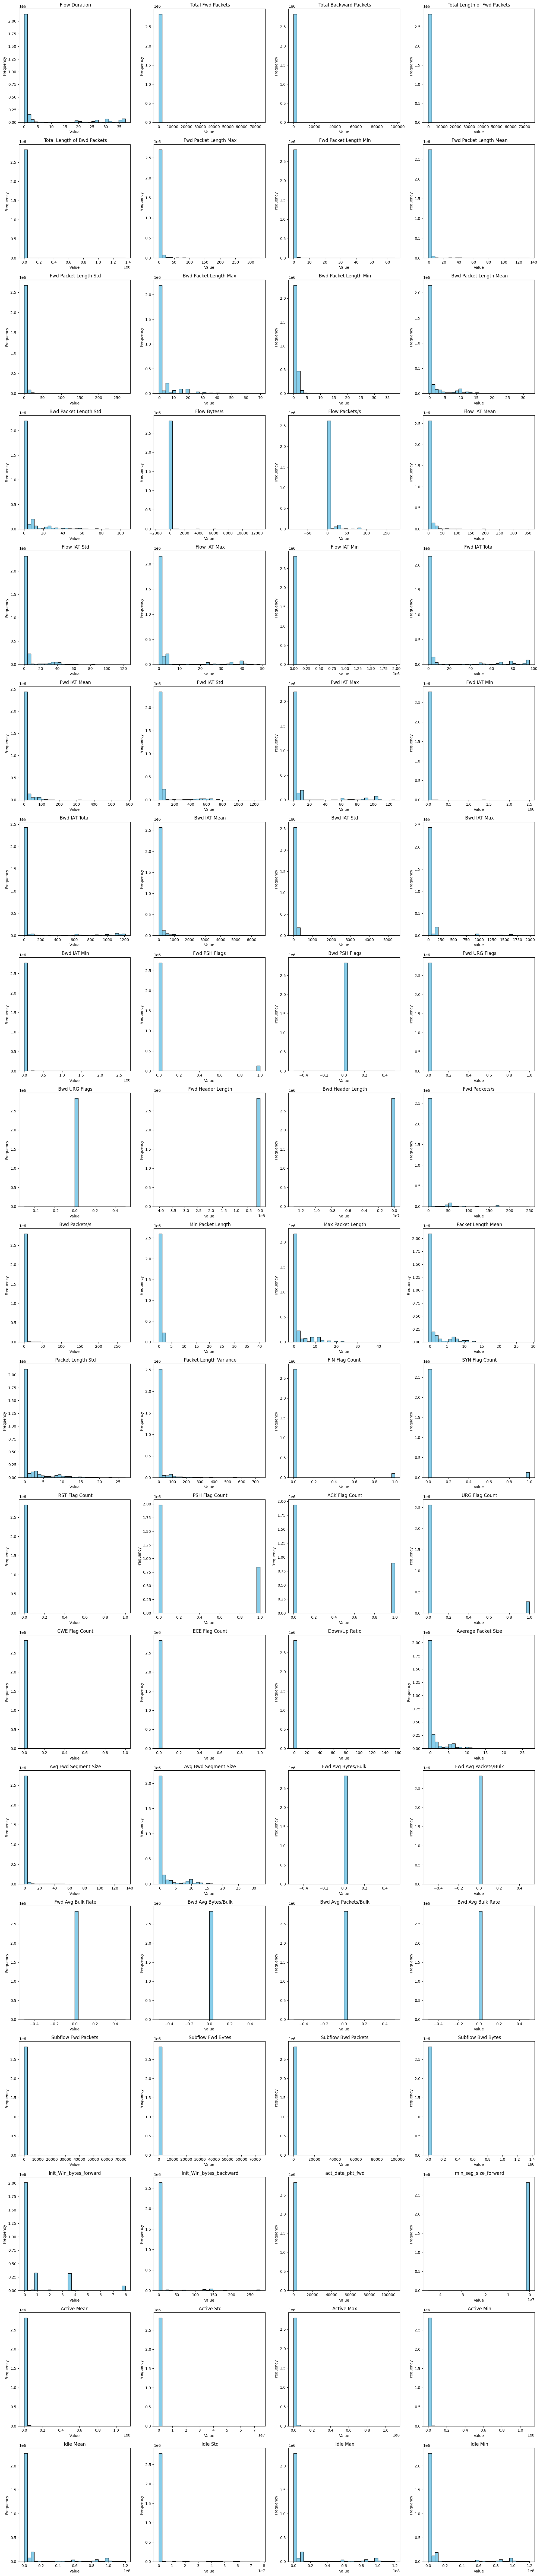

In [ ]:
# Visualize dataset features
def plot_features(label):

  features = data.drop(label, axis=1).columns
  num_features = len(features)

  # Calculate the number of rows needed
  num_cols = 4
  num_rows = (num_features + num_cols - 1) // num_cols

  fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
  axs = axs.flatten()

  for num, col in enumerate(features):
      axs[num].hist(data[col], bins=30, color='skyblue', edgecolor='black')
      axs[num].set_title(col)
      axs[num].set_xlabel('Value')
      axs[num].set_ylabel('Frequency')

  # Hide any unused subplots
  for i in range(num_features, len(axs)):
      fig.delaxes(axs[i])

  plt.tight_layout()
  plt.show()

  return

# plot_features([' Fwd Header Length.1', ' Label', ' Destination Port'])

# Feature Engineering:
In this section I will drop those unrelated features, SMOTE some labels of ProtocolName which has less values than 11000 and convert `Label` feature from Object to Numerical values.

In [ ]:
# Drop unrelated feature
data.drop(' Fwd Header Length.1', axis=1, inplace=True)

In [ ]:
# Drop BENIGN (Normal) data from dataset

def drop_normal():
  '''
  This function will drop all Normal data and just retain the attack types.
  '''
  # index of Normal data in dataset
  index = data[data[' Label'] == 'BENIGN'].index

  # dropping normal data
  data.drop(index,inplace=True)

  return data

drop_normal()
data

In [ ]:
# check types and values of each label
data[' Label'].value_counts()

**SMOTE:** Smote is used for synthetic minority oversampling in machine learning. It generates synthetic samples to balance imbalanced datasets, specifically targeting the minority class.

In [ ]:
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
import random
from collections import Counter

# oversampling
def oversample(dataset):
    '''
    This function is going to ovesample the dataset which in labels
    values less then 11000 become randomly between 30 to 50 thousands
    '''

    # Calculate the new value counts after duplication
    value_counts = dataset[' Label'].value_counts()

    # Determine the target number of samples for SMOTE (between 30,000 and 50,000)
    target_samples = {label: random.randint(30000, 50000) for label, count in value_counts.items() if count < 11000}

    # Separate features and labels
    X = dataset.drop(' Label', axis=1)
    y = dataset[' Label']

    # Apply SMOTE
    smote = SMOTE(sampling_strategy=target_samples)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Print the new class distribution
    print("New class distribution:")
    print(Counter(y_resampled))

    # Combine the resampled data back into a DataFrame
    dataset = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=[' Label'])], axis=1)

    # Shuffle the data and reset the index
    dataset = shuffle(dataset).reset_index(drop=True)

    # Save the resampled DataFrame
    # dataset.to_csv('/content/drive/MyDrive/Final-Project/data/normal_resampled_dataset.csv', index=False)

    # Print the number of samples needed for each class
    print("Number of samples after resampling:")
    for label, count in target_samples.items():
        print(f"{label}: {count}")
    data = dataset
    return data

oversample(data)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Final-Project/data/normal_resampled_dataset.csv')
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,264,-0.009695,-0.333333,-0.333333,-0.354286,-0.243750,-0.493333,-0.055556,-0.772727,0.000000,...,1.333333,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,PortScan
1,80,0.922447,0.333333,-0.666667,-0.354286,-0.256250,-0.493333,-0.055556,-0.772727,0.000000,...,1.333333,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,DoS slowloris
2,80,3.451233,1.937634,1.270968,1.212977,23.977083,3.163614,-0.055556,0.033636,3.768861,...,0.666667,8.698839e+02,0.0,8.698839e+02,8.698839e+02,6.146211e+06,0.0,6.146211e+06,6.146211e+06,DoS GoldenEye
3,13782,-0.009710,-0.333333,-0.333333,-0.342857,-0.243750,-0.466667,0.000000,-0.727273,0.000000,...,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,PortScan
4,2042,-0.009719,-0.333333,-0.333333,-0.342857,-0.243750,-0.466667,0.000000,-0.727273,0.000000,...,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,PortScan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951115,20031,-0.009699,-0.333333,-0.333333,-0.342857,-0.243750,-0.466667,0.000000,-0.727273,0.000000,...,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,PortScan
951116,80,0.557272,0.333333,1.333333,-0.205714,23.925000,-0.226667,-0.055556,-0.575758,0.392280,...,-0.333333,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,DDoS
951117,38292,-0.009710,-0.333333,-0.333333,-0.354286,-0.243750,-0.493333,-0.055556,-0.772727,0.000000,...,1.333333,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,PortScan
951118,21,2.785700,2.333333,4.333333,0.251429,0.135417,-0.186667,-0.055556,-0.505051,0.360979,...,0.666667,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,FTP-Patator


In [ ]:
data[' Label'].value_counts()

,count
Label,
DoS Hulk,230124
PortScan,158930
DDoS,128027
DoS GoldenEye,49556
Heartbleed,47760
FTP-Patator,47378
SSH-Patator,42145
Infiltration,41424
Web Attack � XSS,40349


In [ ]:
data[' Label'].value_counts() / len(data)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Function to encode Label using one-hot encoding
def encode_protocol_name(dataset):
  '''
  This function first extract data of Label feature and encode it to 0 and 1
  then convert back to Dataframe and Dropping the Label feature.
  '''

  # Initialize the OneHotEncoder
  encoder = OneHotEncoder(sparse_output=False)

  # Extract the ' Label' column and reshape it to 2D array
  protocol_name_column = dataset[[' Label']]

  # Fit and transform the ' Label' column
  one_hot_encoded = encoder.fit_transform(protocol_name_column)

  # Convert the one-hot encoded array into a DataFrame
  one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out([' Label']))

  # Drop the original ProtocolName column
  dataset.drop(' Label', axis=1, inplace=True)

  # Concatenate the original dataset with the one-hot encoded DataFrame
  dataset = pd.concat([data, one_hot_encoded_df], axis=1)

  return dataset

data = encode_protocol_name(data)
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Label_DoS Slowhttptest,Label_DoS slowloris,Label_FTP-Patator,Label_Heartbleed,Label_Infiltration,Label_PortScan,Label_SSH-Patator,Label_Web Attack � Brute Force,Label_Web Attack � Sql Injection,Label_Web Attack � XSS
0,264,-0.009695,-0.333333,-0.333333,-0.354286,-0.243750,-0.493333,-0.055556,-0.772727,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,80,0.922447,0.333333,-0.666667,-0.354286,-0.256250,-0.493333,-0.055556,-0.772727,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80,3.451233,1.937634,1.270968,1.212977,23.977083,3.163614,-0.055556,0.033636,3.768861,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13782,-0.009710,-0.333333,-0.333333,-0.342857,-0.243750,-0.466667,0.000000,-0.727273,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2042,-0.009719,-0.333333,-0.333333,-0.342857,-0.243750,-0.466667,0.000000,-0.727273,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951115,20031,-0.009699,-0.333333,-0.333333,-0.342857,-0.243750,-0.466667,0.000000,-0.727273,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
951116,80,0.557272,0.333333,1.333333,-0.205714,23.925000,-0.226667,-0.055556,-0.575758,0.392280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
951117,38292,-0.009710,-0.333333,-0.333333,-0.354286,-0.243750,-0.493333,-0.055556,-0.772727,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
951118,21,2.785700,2.333333,4.333333,0.251429,0.135417,-0.186667,-0.055556,-0.505051,0.360979,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [ ]:
# importing train_test_split
from sklearn.model_selection import train_test_split

# split function
def split_data(dataset):
  dataset = dataset.sample(frac=1, random_state=1).reset_index(drop=True)

  one_hot_columns = [col for col in data.columns if col.startswith(' Label')]

  # Split the dataset into X (features) and y (labels)
  x = dataset.drop(columns=one_hot_columns)
  y = dataset[one_hot_columns]

  # Split the data into train, validation, and test sets
  x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=1)
  x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.7, random_state=1)



  return x_train, x_val, x_test, y_train, y_val, y_test

In [ ]:
# convert Pandas DataFrame into Tensorflow Tensor

def dataframe_to_tensor():
  '''
  This function is going to convert Pandas DataFrame into TensorFlow Tensor
  and then Reshape them from 2D to 3D for model fitting.
  And at last change them to tensorflow dataset and shuffle them for better model operation.
  '''
  # set random seed
  tf.random.set_seed(1)

  # train validate and test the dataset first using scikit-learn then convert them into tensor
  x_train, x_val, x_test, y_train, y_val, y_test = split_data(data)

  # DataFrame to TensorFlow Tensor
  x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
  x_val = tf.convert_to_tensor(x_val, dtype=tf.float32)
  x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
  y_train = tf.convert_to_tensor(y_train, dtype=tf.int16)
  y_val = tf.convert_to_tensor(y_val, dtype=tf.int16)
  y_test = tf.convert_to_tensor(y_test, dtype=tf.int16)


  # reshape the tensor from 2D to 3D
  x_train = tf.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
  x_val = tf.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
  x_test = tf.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  # Convert to tf.data.Dataset
  train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
  val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
  test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

  # Shuffle and batch the datasets
  batch_size = 32  # Try reducing this further if needed
  train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
  val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
  test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)


  return train_dataset, val_dataset, test_dataset, x_test, y_test


In [ ]:
# Call Dataframe into tensor function

train_dataset, val_dataset, test_dataset, x_test, y_test = dataframe_to_tensor()

In [ ]:
# Second training
from tensorflow.keras import layers, models
import time
import pickle

def create_model(input_shape, num_classes):
    model = models.Sequential()

    # Add Conv1D layers with padding to avoid negative dimensions
    model.add(layers.Conv1D(32, 3, padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv1D(64, 3, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Dropout(0.3))

    # Flatten the output and add Dense layers for classification
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(num_classes, activation='softmax'))  # Multi-class classification, use softmax activation

    return model

# Example usage:
input_shape = (77, 1)  # Update this to match your dataset's input shape
num_classes = 14       # Update this to match the number of classes in your dataset

model = create_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use sparse_categorical_crossentropy if labels are not one-hot encoded
              metrics=['accuracy'])

# Summary of the model
model.summary()

# Assume train_dataset, val_dataset, and test_dataset are already created and preprocessed
# timeout
start = time.time()

# Train the model with callbacks
history = model.fit(train_dataset,
                    epochs=7,
                    validation_data=val_dataset)

end = time.time()

# Save the model
model.save('/content/drive/MyDrive/Final-Project/Saved-models/Multi-attack/final_multiclass1.h5')

# Save the training history
with open('/content/drive/MyDrive/Final-Project/Saved-models/Multi-attack/final_multiclass1.pkl', 'wb') as file:
    pickle.dump(history.history, file)

duration = end - start

print(f'Training time: {duration:.2f} seconds')

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset)
print('Test accuracy:', test_acc)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 77, 32)            128       
                                                                 
 batch_normalization (Batch  (None, 77, 32)            128       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 38, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 38, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 38, 64)            6208      
                                                                 
 batch_normalization_1 (Bat  (None, 38, 64)            2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training time: 2451.14 seconds
6242/6242 [==============================] - 27s 4ms/step - loss: 0.0737 - accuracy: 0.9663
Test accuracy: 0.9662654995918274


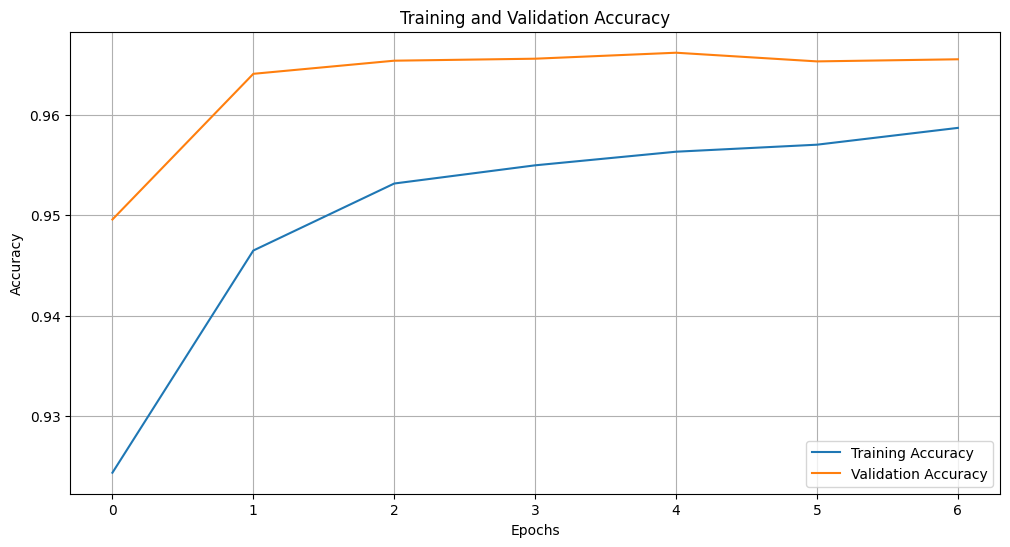

In [ ]:
# plot the history
def history_plot(history):
  plt.figure(figsize=(12, 6))
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

history_plot(history)

6242/6242 [==============================] - 38s 6ms/step
Confusion Matrix as List:
{'Class': 0, 'True Positive': 7135, 'False Positive': 9, 'False Negative': 7, 'True Negative': 192585}
{'Class': 1, 'True Positive': 26608, 'False Positive': 13, 'False Negative': 63, 'True Negative': 173052}
{'Class': 2, 'True Positive': 10162, 'False Positive': 151, 'False Negative': 111, 'True Negative': 189312}
{'Class': 3, 'True Positive': 48448, 'False Positive': 120, 'False Negative': 67, 'True Negative': 151101}
{'Class': 4, 'True Positive': 6349, 'False Positive': 174, 'False Negative': 39, 'True Negative': 193174}
{'Class': 5, 'True Positive': 7344, 'False Positive': 29, 'False Negative': 198, 'True Negative': 192165}
{'Class': 6, 'True Positive': 10054, 'False Positive': 8, 'False Negative': 31, 'True Negative': 189643}
{'Class': 7, 'True Positive': 10030, 'False Positive': 0, 'False Negative': 0, 'True Negative': 189706}
{'Class': 8, 'True Positive': 8760, 'False Positive': 6, 'False Negativ

<ipython-input-14-ccc5eaff639a>:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_classes)


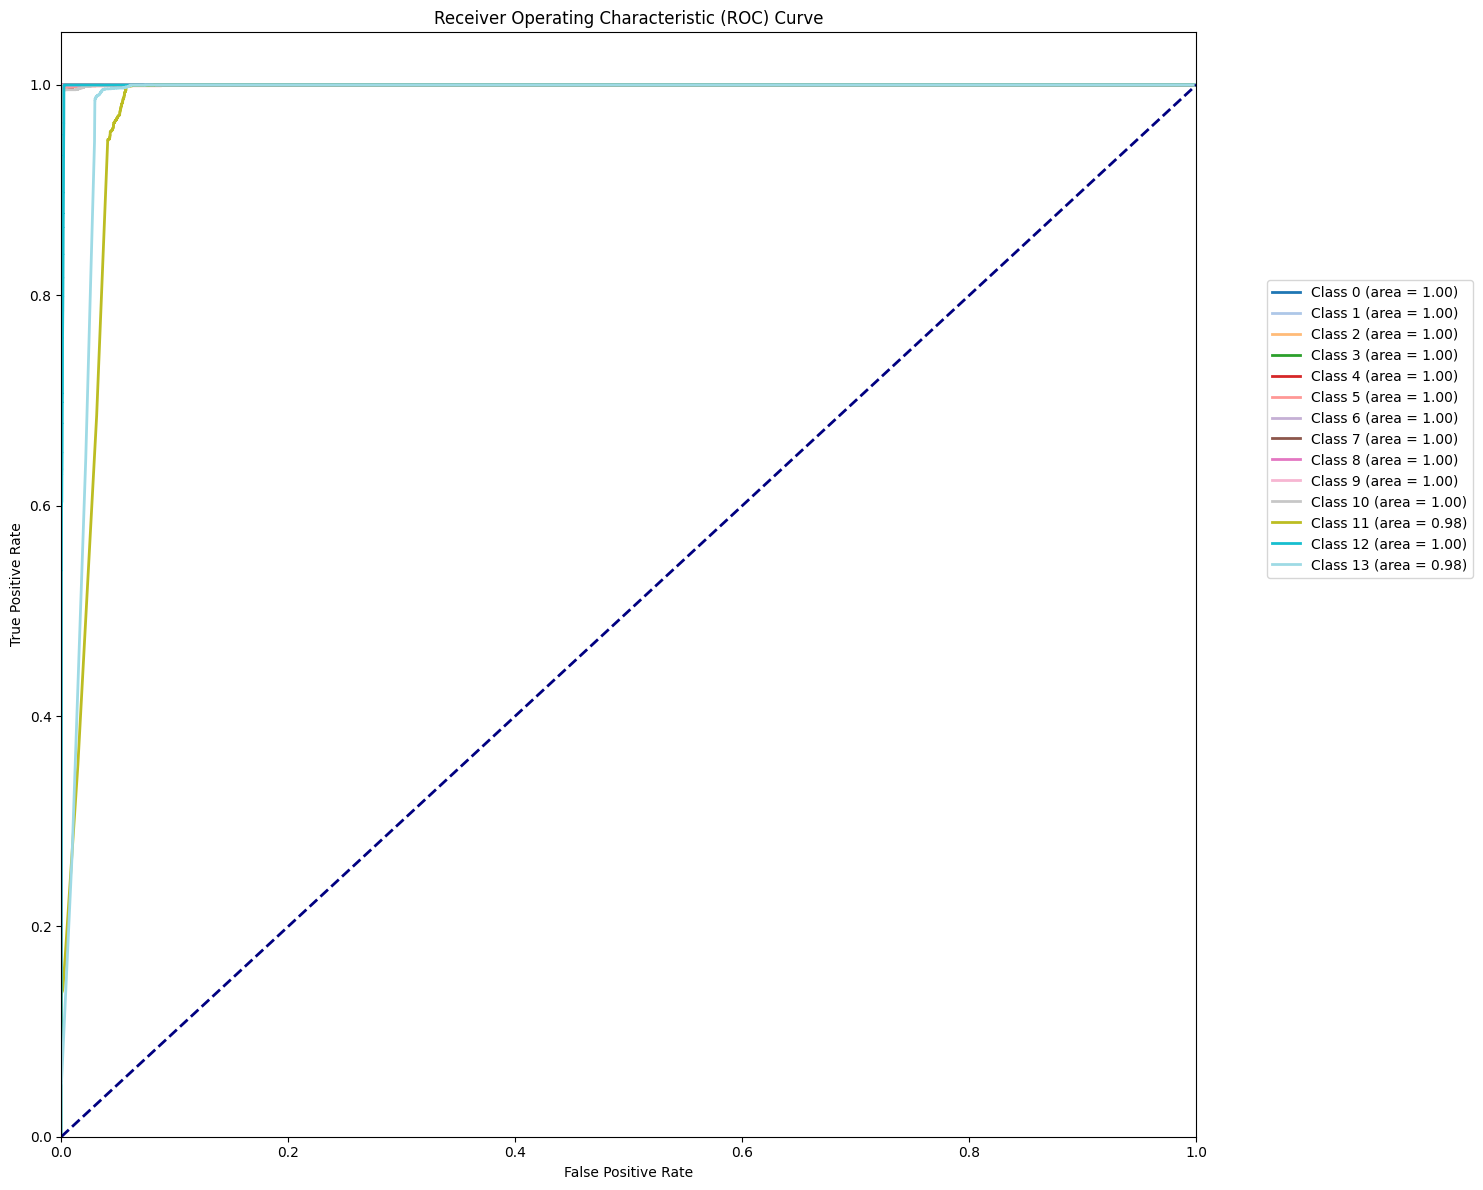

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Evaluation function for multi-class classification
def eval_metrics(model, x_test, y_test, num_classes):
    # Predict on the test dataset
    y_pred_proba = model.predict(x_test)
    y_pred = np.argmax(y_pred_proba, axis=-1)

    # Convert one-hot encoded y_test back to class indices
    y_test_indices = np.argmax(y_test, axis=-1)

    # Confusion Matrix
    cm = confusion_matrix(y_test_indices, y_pred)
    cm_list = []
    for i in range(num_classes):
        cm_list.append({
            'Class': i,
            'True Positive': cm[i, i],
            'False Positive': sum(cm[:, i]) - cm[i, i],
            'False Negative': sum(cm[i, :]) - cm[i, i],
            'True Negative': sum(sum(cm)) - (sum(cm[:, i]) + sum(cm[i, :]) - cm[i, i])
        })

    # Print Confusion Matrix as List
    print("Confusion Matrix as List:")
    for entry in cm_list:
        print(entry)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test_indices, y_pred, target_names=[str(i) for i in range(num_classes)]))

    # ROC Curve and AUC for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    plt.figure(figsize=(15, 12))
    colors = plt.cm.get_cmap('tab20', num_classes)
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], color=colors(i), lw=2, label='Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    # Plot ROC curves
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right", bbox_to_anchor=(1.25, 0.5))
    plt.tight_layout()
    plt.show()

    return

# Call the evaluation function with x_test and y_test
eval_metrics(model, x_test, y_test, num_classes=14)